In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from scipy import stats
import glob
import matplotlib.pyplot as plt

In [4]:
strProjectDir = '/project/bioinformatics/DLLab/s187521/Maguire/MTC_Correlation'
strCorrelationXlsx = glob.glob(os.path.join(strProjectDir, 'Corr*.xlsx'))[0]

In [32]:
dfCorr = pd.read_excel(strCorrelationXlsx)

In [33]:
dfCorr.shape

(31, 11)

In [34]:
dfCorr.head()

,Related ERP,Unrelated ERP,Related ERSP,Unrelated ERSP,Related ITC,Unrelated ITC,Related_PL,Unrelated_PL,Diff_ERP,Diff_ERSP,Diff_PL
0,0.560538,-0.626607,-0.164606,0.198252,0.096112,0.103566,-0.260718,0.094686,-1.187145,0.362858,0.355404
1,0.180159,-0.101855,-0.277201,0.429039,0.117032,0.173135,-0.394232,0.255904,-0.282014,0.706240,0.650136
2,-0.685899,-0.531979,0.403274,0.804269,0.124818,0.289896,0.278456,0.514373,0.153920,0.400995,0.235916
3,-0.168691,0.358589,-0.050926,0.356581,0.128303,0.135734,-0.179229,0.220847,0.527281,0.407507,0.400076
4,-1.975439,-1.518363,0.300150,0.043019,0.070004,0.131593,0.230146,-0.088573,0.457076,-0.257131,-0.318720


In [35]:
stats.linregress(dfCorr['Diff_ERP'], dfCorr['Diff_ERSP'])

LinregressResult(slope=0.8329964187742085, intercept=-0.5676946928968736, rvalue=0.4202264795670184, pvalue=0.01858645436086997, stderr=0.3340171078819989)

In [36]:
0.42**2

0.17639999999999997

/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

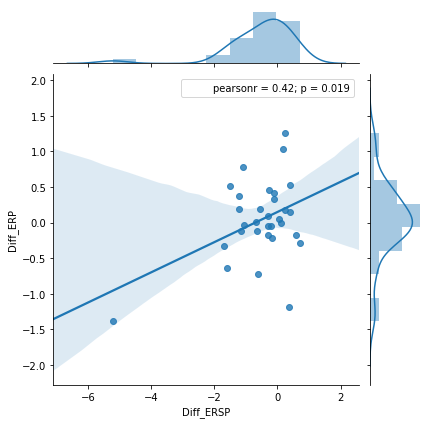

In [37]:
sns.jointplot(x='Diff_ERSP', y='Diff_ERP', data=dfCorr, fit_reg=True, kind='reg')

# Generating same data from ERP and ERSP amplitudes

In [13]:
strDataDir = os.path.join(strProjectDir, 'Correlation', 'JulieAnalysis')
strErpExcel = glob.glob(os.path.join(strDataDir, 'Children*.xlsx'))[0]
strErspCsv = glob.glob(os.path.join(strDataDir, 'Amps*Theta*.csv'))[0]

In [21]:
print(strErpExcel)
print(strErspCsv)

/project/bioinformatics/DLLab/s187521/Maguire/MTC_Correlation/Correlation/JulieAnalysis/Children_RelatedVsUnrelated_3-5_30FirFiltDCN.xlsx
/project/bioinformatics/DLLab/s187521/Maguire/MTC_Correlation/Correlation/JulieAnalysis/Amps_Children_RelatedVsUnrelated_3-5.study_Theta_sig_electrodes_4  8Hz_350  550ms.csv


In [50]:
dfErp = pd.read_excel(strErpExcel)
dfErsp = pd.read_csv(strErspCsv, header=None)
dfErsp = dfErsp.T

Text(0.5,1,'Children: N400 350-550ms\n[FZ, F2, C1, CZ, C2, CP1, CPZ, CP2]')

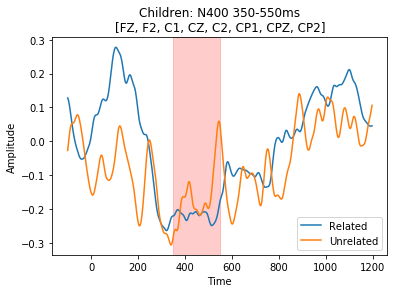

In [51]:
plt.plot(dfErp.loc[:30,:].mean(), label='Related')
plt.plot(dfErp.loc[31:61,:].mean(), label='Unrelated')
plt.axvspan(350, 550, color='red', alpha=0.2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Children: N400 350-550ms\n[FZ, F2, C1, CZ, C2, CP1, CPZ, CP2]')

In [52]:
tupTime = (350, 550)
arrIndexTime = np.multiply(dfErp.columns > tupTime[0], dfErp.columns < tupTime[1])
stats.ttest_rel(dfErp.loc[:30,arrIndexTime].mean(axis=1), 
                dfErp.loc[31:61,arrIndexTime].mean(axis=1))

Ttest_relResult(statistic=-0.5694715299006549, pvalue=0.5732759271934074)

/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

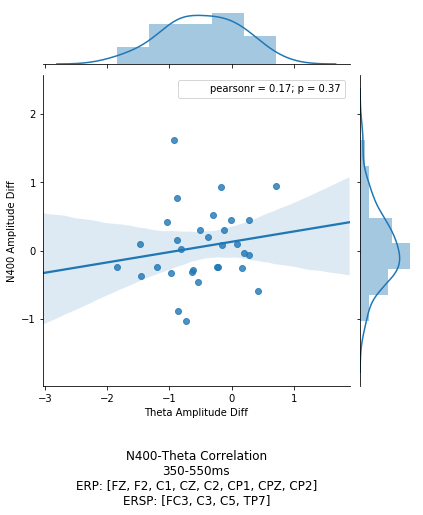

In [56]:
dfErpMeanAmps = pd.DataFrame(index=range(31), columns=['Related', 'Unrelated', 'Unrelated-Related'])
dfErpMeanAmps['Related'] = dfErp.loc[:30,arrIndexTime].mean(axis=1)
dfErpMeanAmps['Unrelated'] = dfErp.loc[31:61,arrIndexTime].mean(axis=1).values
dfErpMeanAmps['Unrelated-Related'] = dfErpMeanAmps['Unrelated'] - dfErpMeanAmps['Related']



dfErsp['Unrelated-Related'] = dfErsp[0] - dfErsp[1]

dfResults = pd.DataFrame(index=range(31), columns=['Theta Amplitude Diff', 'N400 Amplitude Diff'])
dfResults['Theta Amplitude Diff'] = dfErsp['Unrelated-Related']
dfResults['N400 Amplitude Diff'] = dfErpMeanAmps['Unrelated-Related']

sns.jointplot(x='Theta Amplitude Diff', y='N400 Amplitude Diff', data=dfResults, fit_reg=True, kind='reg')
plt.title('N400-Theta Correlation\n350-550ms\n'+\
           'ERP: [FZ, F2, C1, CZ, C2, CP1, CPZ, CP2]\n'+\
           'ERSP: [FC3, C3, C5, TP7]', y=-.4)


dfResults['N400 ({}) Unrelated'.format(tupTime)] = dfErpMeanAmps['Unrelated']
dfResults['N400 ({}) Related'.format(tupTime)] = dfErpMeanAmps['Related']
dfResults['Theta ({}) Unrelated'.format(tupTime)] = dfErsp[0]
dfResults['Theta ({}) Related'.format(tupTime)] = dfErsp[1]

In [40]:
# This is the file Julie emailed me
dfCorr.head()

,Related ERP,Unrelated ERP,Related ERSP,Unrelated ERSP,Related ITC,Unrelated ITC,Related_PL,Unrelated_PL,Diff_ERP,Diff_ERSP,Diff_PL
0,0.560538,-0.626607,-0.164606,0.198252,0.096112,0.103566,-0.260718,0.094686,-1.187145,0.362858,0.355404
1,0.180159,-0.101855,-0.277201,0.429039,0.117032,0.173135,-0.394232,0.255904,-0.282014,0.706240,0.650136
2,-0.685899,-0.531979,0.403274,0.804269,0.124818,0.289896,0.278456,0.514373,0.153920,0.400995,0.235916
3,-0.168691,0.358589,-0.050926,0.356581,0.128303,0.135734,-0.179229,0.220847,0.527281,0.407507,0.400076
4,-1.975439,-1.518363,0.300150,0.043019,0.070004,0.131593,0.230146,-0.088573,0.457076,-0.257131,-0.318720


In [41]:
# This is my attempt at replicating it
dfResults.head()

,Theta Amplitude Diff,N400 Amplitude Diff,"N400 ((350, 550)) Unrelated","N400 ((350, 550)) Related","Theta ((350, 550)) Unrelated","Theta ((350, 550)) Related"
0,-0.301890,0.513865,-0.252651,-0.766517,-0.50534,-0.203450
1,-0.004830,0.448627,0.164521,-0.284106,0.38977,0.394600
2,0.705310,0.947005,0.329795,-0.617210,0.60044,-0.104870
3,0.425400,-0.593173,-0.490651,0.102522,0.32059,-0.104810
4,-0.236346,-0.235204,0.174716,0.409921,-0.17404,0.062306


In [42]:
dfResults.to_csv('./Correlation_350-550_N400_Theta.csv')